        age    gender  hypertension  heart_disease  ever_married  work_type  \
0  0.848142  0.242424           1.0            1.0           0.0   0.320561   
1  0.499512  0.000000           0.0            0.0           1.0   0.220561   
2  0.890137  0.996633           0.0            0.0           1.0   0.220561   
3  0.667996  0.996633           0.0            0.0           1.0   0.220561   
4  0.960607  0.996633           0.0            1.0           1.0   0.909346   

        bmi  smoking_status  stroke  
0  0.276346        0.703401       1  
1  0.264195        1.000000       0  
2  0.192352        0.703401       0  
3  0.205777        1.000000       1  
4  0.224139        0.321088       1  
Index(['age', 'gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'bmi', 'smoking_status', 'stroke'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6222 entries, 0 to 6221
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dty

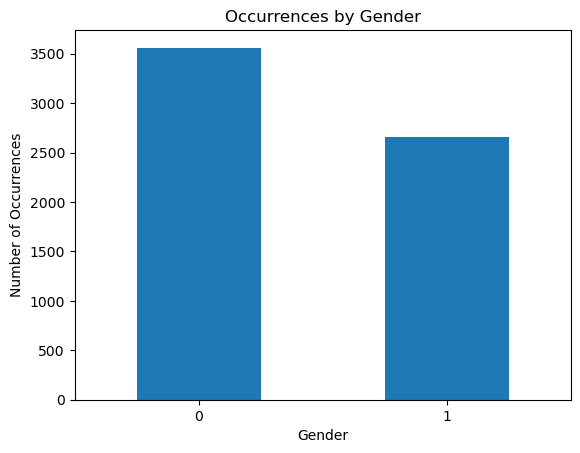

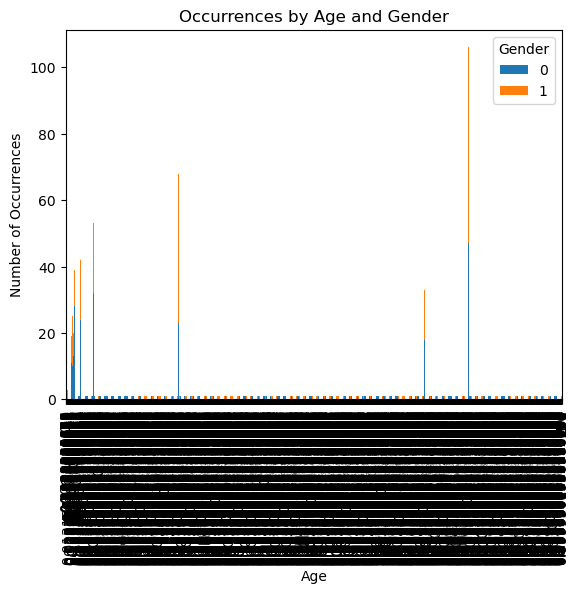

The age with the highest occurrence is: 0.951171875


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your datasets separately with improved performance settings
work_life_balance_data = pd.read_csv('/Users/alvaroquintero/Project/Capstone-Project-Report/Cleaned Data/cleaned_work_life_balance.csv', low_memory=False)
stroke_prediction_data = pd.read_csv('/Users/alvaroquintero/Project/Capstone-Project-Report/Cleaned Data/cleaned_stroke_prediction_dataset.csv', low_memory=False)

# Choose stroke prediction dataset for analysis
data = stroke_prediction_data  

# Check the first few rows and summary of the dataset
print(data.head())
print(data.columns)  # List all column names
print(data.info())

# Check unique values in the gender column for better understanding
print("Unique values in 'gender':", data['gender'].unique())
print("Unique values in 'age':", data['age'].unique()) 

# Count occurrences by gender - adjusting for unique encoded values
if 'gender' in data.columns:
    # If 'gender' values are floats (e.g., 0.0 for male, 1.0 for female), you might want to convert them to binary
    data['gender'] = data['gender'].apply(lambda x: 1 if x >= 0.5 else 0)  # Adjust according to understanding
    
    gender_counts = data['gender'].value_counts()
else:
    raise KeyError("The column 'gender' does not exist in the DataFrame.")

print("Gender Counts:\n", gender_counts)

# Group by age and gender to find occurrences
if 'age' in data.columns and 'gender' in data.columns:
    age_gender_counts = data.groupby(['age', 'gender']).size().unstack(fill_value=0)
else:
    raise KeyError("One of the columns 'age' or 'gender' does not exist in the DataFrame.")

print("Age and Gender Counts:\n", age_gender_counts)

# Plotting the occurrences by gender
gender_counts.plot(kind='bar', title='Occurrences by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.show()

# Plotting occurrences by age for each gender
age_gender_counts.plot(kind='bar', stacked=True, title='Occurrences by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Number of Occurrences')
plt.legend(title='Gender')
plt.show()

# Finding the age with the highest occurrence
max_age_occurrence = data['age'].value_counts().idxmax()  # Use 'age' as the correct column
print(f'The age with the highest occurrence is: {max_age_occurrence}')


   gender        age
0  Female  68.312102
1    Male  66.428458


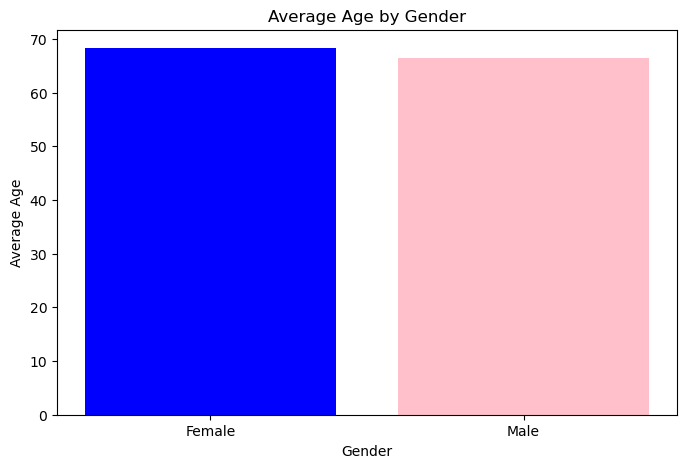

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your datasets
work_life_balance_data = pd.read_csv('/Users/alvaroquintero/Project/Capstone-Project-Report/Cleaned Data/cleaned_work_life_balance.csv', low_memory=False)
stroke_prediction_data = pd.read_csv('/Users/alvaroquintero/Project/Capstone-Project-Report/Cleaned Data/cleaned_stroke_prediction_dataset.csv', low_memory=False)

# Merge or concatenate datasets if necessary and create a single dataframe
# For illustration, let's assume you are combining data into 'data'
data = pd.concat([work_life_balance_data, stroke_prediction_data], ignore_index=True)

# Adjust the gender column (0.5 threshold for male and female as you defined earlier)
data['gender'] = data['gender'].apply(lambda x: 'Female' if x >= 0.5 else 'Male')

# If 'age' needs to be reverted to an original metric
# Assuming 'age' is normalized between 0 and 1 to represent ages between 0-100:
data['age'] = (data['age'] * 100)  # Denormalize if necessary

# Calculate average ages by gender
average_age_by_gender = data.groupby('gender')['age'].mean().reset_index()
print(average_age_by_gender)

# Optionally, you can visualize the average age by gender
plt.figure(figsize=(8, 5))
plt.bar(average_age_by_gender['gender'], average_age_by_gender['age'], color=['blue', 'pink'])
plt.title('Average Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.xticks(rotation=0)
plt.show()
